In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# removed this like and replaced below
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import os

In [53]:
iti = pd.read_csv('ItinerariesDemand.csv', delimiter = ';')

In [54]:
dri = pd.read_csv('AvailabilityDrivers2.csv', delimiter = ';')

In [55]:
iti['mes'] = pd.to_datetime(iti['dia']).dt.month
iti['dia'] = pd.to_datetime(iti['dia']).dt.day

dri['mes'] = pd.to_datetime(dri['dia']).dt.month
dri['dia'] = pd.to_datetime(dri['dia']).dt.day

In [56]:
print(str(len(iti)) + ' - ' + str(len(dri)))

3123 - 8399


In [57]:
df = pd.merge(dri, iti, left_on=['mes','dia','hora','periodo'], right_on=['mes','dia','hora','periodo'], how='left')
df.dropna(inplace=True)
df.drop(['weekday'], axis=1, inplace=True)
df.head()


,diasemana,dia,hora,periodo,Avail,Moto,Van,Carro,LicGrey,LicRed,ThermalBag,AttendCorp,AttendPresto,AttendPro,Age0-25,Age26-40,Age40-65,Age65+,mes,demand
24,Wednesday,2,9,0,226,198,1,27,86,140,191,184,190,205,18,152,49,0,10,4.0
25,Wednesday,2,9,30,214,190,1,23,87,127,186,173,186,195,17,147,47,0,10,17.0
26,Wednesday,2,10,0,223,199,2,22,88,135,195,181,195,202,18,153,46,0,10,5.0
27,Wednesday,2,10,30,226,208,1,17,86,140,200,192,200,208,23,148,48,0,10,15.0
28,Wednesday,2,11,0,218,203,1,14,88,130,193,186,193,196,21,145,47,0,10,9.0


In [58]:
df.describe()

,dia,hora,periodo,Avail,Moto,Van,Carro,LicGrey,LicRed,ThermalBag,AttendCorp,AttendPresto,AttendPro,Age0-25,Age26-40,Age40-65,Age65+,mes,demand
count,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000
mean,17.655370,11.587587,14.871376,185.093508,158.890568,2.503471,23.699469,84.771744,100.321764,154.413638,139.470396,153.757044,163.805227,15.370355,122.186607,43.547162,0.114332,6.857901,11.882401
std,8.106852,3.629798,15.002512,54.541432,50.545612,1.727590,10.919843,29.962323,29.864539,49.006169,45.004004,48.809983,48.096598,6.513093,35.357625,13.796087,0.351227,4.599506,14.402140
min,1.000000,4.000000,0.000000,12.000000,11.000000,0.000000,1.000000,6.000000,6.000000,11.000000,10.000000,11.000000,9.000000,0.000000,9.000000,2.000000,0.000000,1.000000,1.000000
25%,13.000000,9.000000,0.000000,152.000000,128.000000,1.000000,16.000000,66.000000,80.000000,125.000000,111.000000,124.000000,134.000000,11.000000,100.000000,35.000000,0.000000,2.000000,3.000000
50%,18.000000,11.000000,0.000000,193.000000,166.000000,2.000000,22.000000,86.000000,104.000000,162.000000,147.000000,161.000000,170.000000,16.000000,128.000000,44.000000,0.000000,10.000000,6.000000
75%,24.000000,14.000000,30.000000,226.000000,198.000000,4.000000,29.000000,106.000000,120.000000,192.000000,174.000000,191.000000,199.000000,20.000000,148.000000,53.000000,0.000000,11.000000,15.000000
max,31.000000,22.000000,30.000000,322.000000,275.000000,9.000000,67.000000,165.000000,198.000000,271.000000,249.000000,269.000000,290.000000,34.000000,213.000000,86.000000,2.000000,12.000000,141.000000


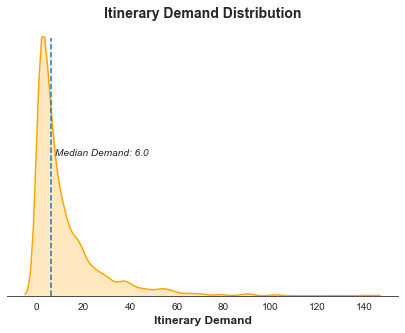

In [59]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize=(7,5))

# Create plot
sns.distplot(df['demand'],
             # Set color of density plot 
             color = "orange", 
             # Shade it for better aesthetics
             kde_kws = {"shade":True}, 
             # Remove historgram
             hist = False)

# Add vertical line
plt.axvline(df['demand'].median(),
            # Set upper limit for vertical line 
            ymax = 0.95, 
            # Set linestyle to "--"
            linestyle = "--")

# Add median age of all employees
plt.text(df['demand'].median() + 2, 0.04,
         # Create text 
         'Median Demand: ' + str(df['demand'].median()), 
         # Set text style
         fontsize = 10, 
         style = "italic")

# Despine plot
sns.despine(left = True)
# Add finishing touches
plt.yticks([])
plt.xlabel('Itinerary Demand', fontsize = 12, fontweight = "semibold")
plt.title('Itinerary Demand Distribution', fontsize = 14, fontweight = "semibold")
plt.show()

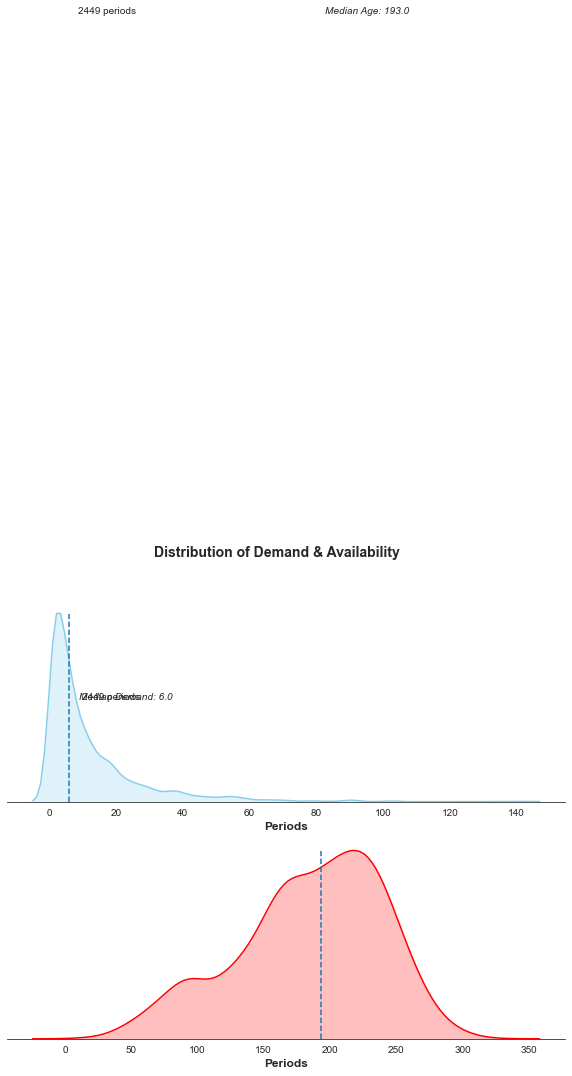

In [62]:
# Set initial plot options
sns.set_style('white')

# Create figure and axes
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Create plot of demand distribution on first axes
sns.distplot(df['demand'],
             color = "skyblue",
             kde_kws = {"shade":True},
             hist = False, ax = axes[0])

# Add vertical line and annotate median demand on first axes
axes[0].axvline(df['demand'].median(), ymax = 0.95, linestyle = "--")
axes[0].text(df['demand'].median() + 3, 0.04, 'Median Demand: ' + str(df['demand'].median()) , 
             fontsize = 10, style = "italic")
# Add number of demand for context
axes[0].text(10, 0.04, str(df.shape[0]) + " periods" , fontsize = 10)
# Format subplot in axes
axes[0].set_yticks([])
axes[0].set_xlabel("Periods", fontsize = 12, fontweight = "semibold")


# Create plot of female age distribution on second axes
sns.distplot(df['Avail'],
             color = "r",
             kde_kws = {"shade":True},
             hist = False, ax = axes[1])

# Add vertical line and annotate median age for female employees on first axes
axes[1].axvline(df['Avail'].median(), ymax = 0.95, linestyle = "--")
axes[1].text(df['Avail'].median() + 3, 0.04, 'Median Age: ' + str(df['Avail'].median()) , fontsize = 10, style = "italic")
# Add number of female employees for context
axes[1].text(10, 0.04, str(df.shape[0]) + " periods" , fontsize = 10)
axes[1].set_yticks([])
axes[1].set_xlabel("Periods", fontsize = 12, fontweight = "semibold")

# Despine visualizations
sns.despine(left = True)
# Figure final formatting   
fig.suptitle('Distribution of Demand & Availability', fontsize = 14, fontweight = "semibold")
plt.show()

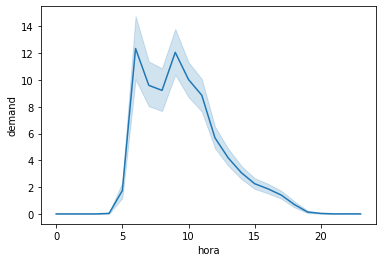

In [48]:
ax = sns.lineplot(x="hora", y="demand", data=df)

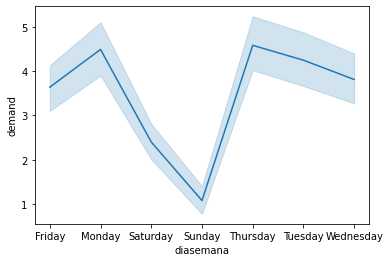

In [51]:
ax = sns.lineplot(x="diasemana", y="demand", data=df)

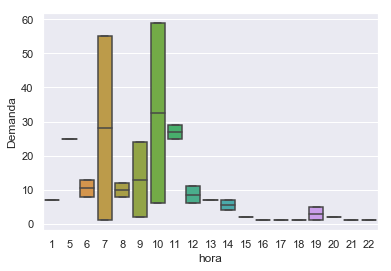

In [132]:
ax = sns.boxplot(x="hora", y="Demanda", data=dri)

In [117]:
dri.describe()

,hora,periodo,Avail,Reject,Moto,Van,Carro,LicGrey,LicRed,ThermalBag,Demanda,Excesodispo
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,12.911765,15.882353,144.116558,77.802832,124.420479,2.326797,17.369281,67.948802,76.167756,120.797386,9.941176,56.372549
std,5.184055,14.982188,58.742906,31.515957,56.477958,1.581643,3.663283,32.126532,28.586057,54.720229,14.059960,29.650133
min,1.000000,0.000000,34.000000,19.000000,17.000000,0.000000,7.000000,10.000000,23.000000,16.000000,1.000000,-35.000000
25%,9.000000,0.000000,94.000000,51.000000,76.000000,1.000000,15.000000,42.000000,51.000000,74.000000,1.000000,35.000000
50%,13.000000,30.000000,141.500000,76.500000,122.000000,2.000000,17.000000,66.000000,75.000000,119.500000,5.500000,56.000000
75%,17.000000,30.000000,192.000000,103.000000,172.750000,3.000000,20.000000,91.000000,101.000000,166.000000,11.000000,80.000000
max,22.000000,30.000000,269.000000,145.000000,241.000000,9.000000,27.000000,143.000000,158.000000,235.000000,59.000000,117.000000


In [127]:
model_all = "Demanda~diasemana+hora+Avail+Reject+Moto+Van+Carro+LicGrey+LicRed+ThermalBag" 
lm_all    = sm.ols(formula = model_all, data = dri).fit()
print(lm_all.summary())



                            OLS Regression Results                            
Dep. Variable:                Demanda   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     21.50
Date:                Wed, 13 May 2020   Prob (F-statistic):           7.08e-45
Time:                        01:07:06   Log-Likelihood:                -3605.0
No. Observations:                 918   AIC:                             7238.
Df Residuals:                     904   BIC:                             7306.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 18

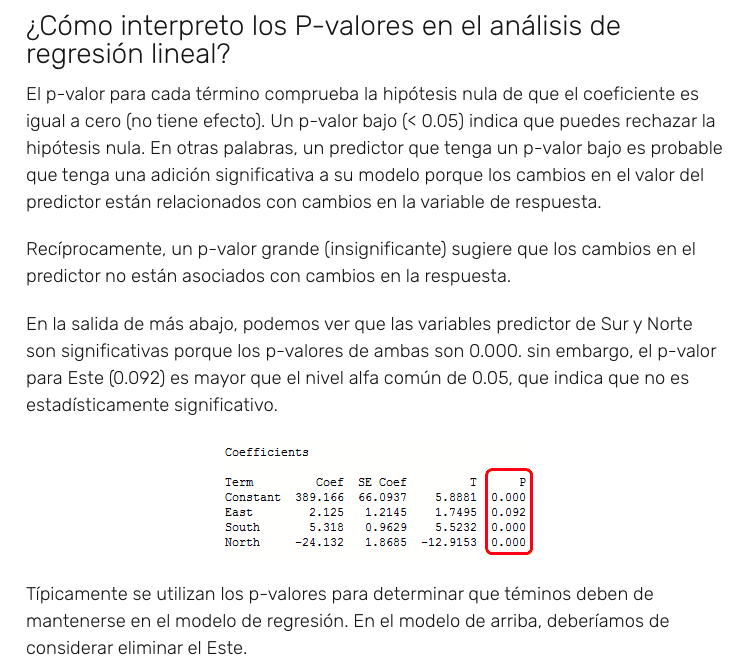

In [128]:
from IPython.display import Image
Image("p.png")

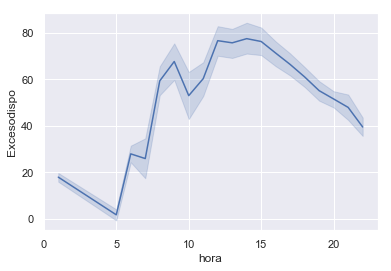

In [129]:
ax = sns.lineplot(x="hora", y="Excesodispo", data=dri)

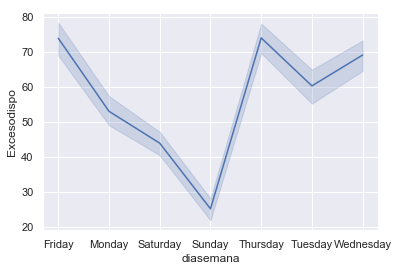

In [130]:
ax = sns.lineplot(x="diasemana", y="Excesodispo", data=dri)